In [16]:
from astropy.table import Table as Table
from astropy.io import fits as fits
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '..')
import honpy as hon
import random as ran

In [2]:
data=fits.open('spheresyn/3_naive_naive_age_check/3_naive_naive_age_check_data.fits')
data.info()

Filename: spheresyn/3_naive_naive_age_check/3_naive_naive_age_check_data.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    130   34498R x 55C   [20A, 2A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [3]:
sim=Table.read(data,hdu=1)

In [4]:
sim.columns

<TableColumns names=('name','component','age','x0','y0','z0','u0','v0','w0','x_now','y_now','z_now','u_now','v_now','w_now','ra','ra_error','dec','dec_error','parallax','parallax_error','pmra','pmra_error','pmdec','pmdec_error','radial_velocity','radial_velocity_error','X','X_error','Y','Y_error','Z','Z_error','U','U_error','V','V_error','W','W_error','X_Y_corr','X_Z_corr','X_U_corr','X_V_corr','X_W_corr','Y_Z_corr','Y_U_corr','Y_V_corr','Y_W_corr','Z_U_corr','Z_V_corr','Z_W_corr','U_V_corr','U_W_corr','V_W_corr','background_log_overlap')>

<ipython-input-5-c9291e8dcaf9>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


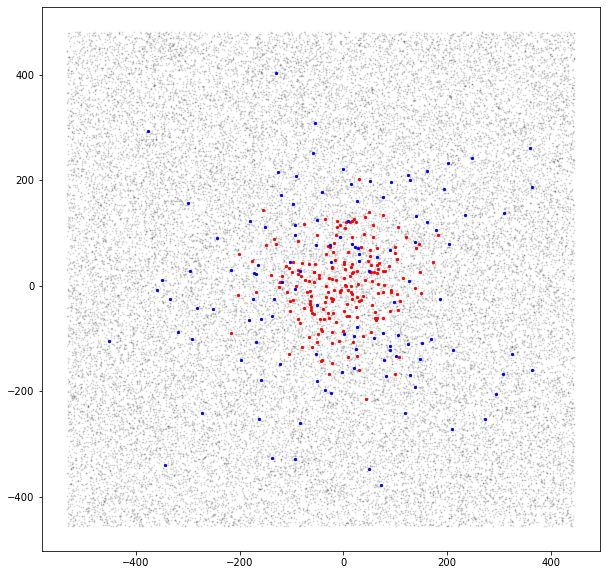

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(sim['x_now'][sim['age'] == 0.0],sim['y_now'][sim['age'] == 0.0],c='black',s=1, alpha=0.1)
ax.scatter(sim['x_now'][sim['age'] == 10.0],sim['y_now'][sim['age'] == 10.0],c='red',s=5, alpha=1)
ax.scatter(sim['x_now'][sim['age'] == 25.0],sim['y_now'][sim['age'] == 25.0],c='blue',s=5, alpha=1)
fig.savefig('symd.png')
#fig.savefig('KerSynthfc.eps')

fig.show()

In [6]:
#At the moment, uncorrected with prior. Makes young M, B-R
    # more likely than they should be. 

def get_col_mags(age,tol=0.5):
    myr_age=10**(hon.age - 6)
    mag  = hon.g [np.logical_and((age-tol)<myr_age,myr_age<(age+tol))]
    blue = hon.bp[np.logical_and((age-tol)<myr_age,myr_age<(age+tol))]
    red  = hon.rp[np.logical_and((age-tol)<myr_age,myr_age<(age+tol))]
    return mag, (blue - red)

In [7]:
mag = []
bp_rp = []
myr_age=10**(hon.age - 6)
twnty_fves_mag, twnty_fves_brs = get_col_mags(25.0)
tens_mag,       tens_brs       = get_col_mags(10.0)
pop_np_array=np.vstack([hon.g,(hon.bp-hon.rp),myr_age]).T
pop=list(map(tuple, pop_np_array))
draw=pop_np_array[np.random.choice(pop_np_array.shape[0],
                          len(sim['age']),
                          p=myr_age/sum(myr_age)).astype(int)]

In [8]:
for i,ag in enumerate(sim['age']):
    if ag == 25.0:
        pick=np.random.randint(0,len(twnty_fves_mag))
        mag.append  (twnty_fves_mag[pick])
        bp_rp.append(twnty_fves_brs[pick])
    if ag == 10.0:
        pick=np.random.randint(0,len(tens_mag))
        mag.append  (tens_mag[pick])
        bp_rp.append(tens_brs[pick])
    if ag ==  0.0:
#       Getting a random synthetic star to imitate,
        mag.append(draw[i][0])
        bp_rp.append(draw[i][1])
        sim['age'][i] = draw[i][2]

In [9]:
print(len(mag),
len(sim['age']))

34498 34498


In [10]:
# def gen_ages(length,usedpop='kerr',imf='const'):
#     if imf=='const':
#         if usedpop=='kerr':
#             return np.random.uniform(np.min(hon.age),np.max(hon.age),[length,])
        
names=('name','component','age','x0','y0','z0','u0','v0','w0','x_now','y_now','z_now',
       'u_now','v_now','w_now','ra','ra_error','dec','dec_error','parallax','parallax_error',
       'pmra','pmra_error','pmdec','pmdec_error','radial_velocity','radial_velocity_error',
       'X','X_error','Y','Y_error','Z','Z_error','U','U_error','V','V_error','W','W_error',
       'X_Y_corr','X_Z_corr','X_U_corr','X_V_corr','X_W_corr','Y_Z_corr','Y_U_corr','Y_V_corr','Y_W_corr',
       'Z_U_corr','Z_V_corr','Z_W_corr','U_V_corr','U_W_corr','V_W_corr','background_log_overlap')

cols=[]
for name_of_column in names:
        cols.append(fits.Column(name=name_of_column, array=sim[name_of_column], format='D'))



cols.append(fits.Column(name='mag_g', array=mag, format='D'))
cols.append(fits.Column(name='bprp_col', array=bp_rp, format='D'))
        
t=fits.BinTableHDU.from_columns(cols)
  
t.writeto('spheresyn/3_naive_naive_age_check/3_naive_naive_age_check_data_SIMMD_AGES.fits',overwrite=True)

In [11]:
check=fits.open('spheresyn/3_naive_naive_age_check/3_naive_naive_age_check_data_SIMMD_AGES.fits')
dbcheck=Table.read(check,hdu=1)

dbcheck.columns

<TableColumns names=('name','component','age','x0','y0','z0','u0','v0','w0','x_now','y_now','z_now','u_now','v_now','w_now','ra','ra_error','dec','dec_error','parallax','parallax_error','pmra','pmra_error','pmdec','pmdec_error','radial_velocity','radial_velocity_error','X','X_error','Y','Y_error','Z','Z_error','U','U_error','V','V_error','W','W_error','X_Y_corr','X_Z_corr','X_U_corr','X_V_corr','X_W_corr','Y_Z_corr','Y_U_corr','Y_V_corr','Y_W_corr','Z_U_corr','Z_V_corr','Z_W_corr','U_V_corr','U_W_corr','V_W_corr','background_log_overlap','mag_g','bprp_col')>

In [12]:
print(len(dbcheck['age']),len(dbcheck['mag_g']),len(dbcheck['bprp_col']))

34498 34498 34498


<bound method Figure.show of <Figure size 576x1008 with 1 Axes>>

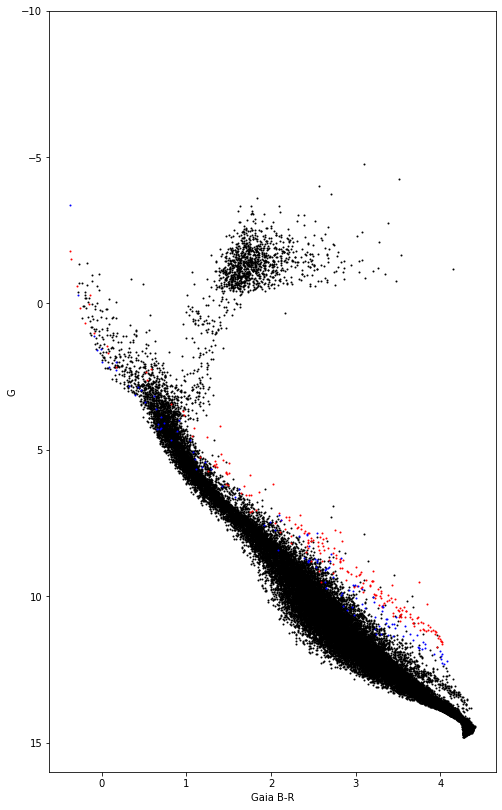

In [13]:
fig, ax = plt.subplots()
#else in black
ax.scatter(dbcheck['bprp_col'][np.logical_and(dbcheck['age']!=25.0,dbcheck['age']!=10.0)],
            dbcheck['mag_g'][np.logical_and(dbcheck['age']!=25.0,dbcheck['age']!=10.0)],
            c='black'
            ,s=1, alpha=1)
#10.0myr in red
ax.scatter(dbcheck['bprp_col'][dbcheck['age']==10.0],
            dbcheck['mag_g'][dbcheck['age']==10.0],
            c='red'
            ,s=1, alpha=1)
#25.0myr in blue
ax.scatter(dbcheck['bprp_col'][dbcheck['age']==25.0],
            dbcheck['mag_g'][dbcheck['age']==25.0],
            c='blue'
            ,s=1, alpha=1)

ax.set_ylabel('G')
ax.set_xlabel('Gaia B-R')
ax.set_ylim(16,-10)
ax.figure.set_size_inches(8, 14)
fig.savefig('synthtest.png')
#fig.savefig('KerSynthfc.eps')
fig.show

In [14]:
print(dbcheck['age'][dbcheck['mag_g']>90])

       age        
------------------
 998.0896261853441
 8121.854805746158
 8967.998129811198
 3843.205504322922
 8909.983988347201
 5991.148462699803
 6321.759492582744
 7798.607626950304
 4444.112144786446
3672.6973783915732
               ...
 6229.292336874651
  6345.57069409869
 9396.095655266337
 5984.338782355249
3489.3031158357903
 7120.314636028447
10644.193836686898
 9562.437610781351
 2948.132194335079
 9381.899776710125
 5706.788083118814
Length = 2327 rows
